C:\Users\torre\AppData\Local\Temp\ipykernel_22004\63599153.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("SPY")['Close']
[*********************100%***********************]  1 of 1 completed


DatetimeIndex(['2025-08-11', '2025-08-12', '2025-08-13', '2025-08-14',
               '2025-08-15', '2025-08-18', '2025-08-19', '2025-08-20',
               '2025-08-21', '2025-08-22', '2025-08-25', '2025-08-26',
               '2025-08-27', '2025-08-28', '2025-08-29', '2025-09-02',
               '2025-09-03', '2025-09-04', '2025-09-05', '2025-09-08',
               '2025-09-09', '2025-09-10'],
              dtype='datetime64[ns]', name='Date', freq=None)







C:\Users\torre\AppData\Local\Temp\ipykernel_22004\63599153.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  usd = (yf.download("DX-Y.NYB", start=spy.index.min())['Close'].pct_change() + 1).cumprod()
[*********************100%***********************]  1 of 1 completed


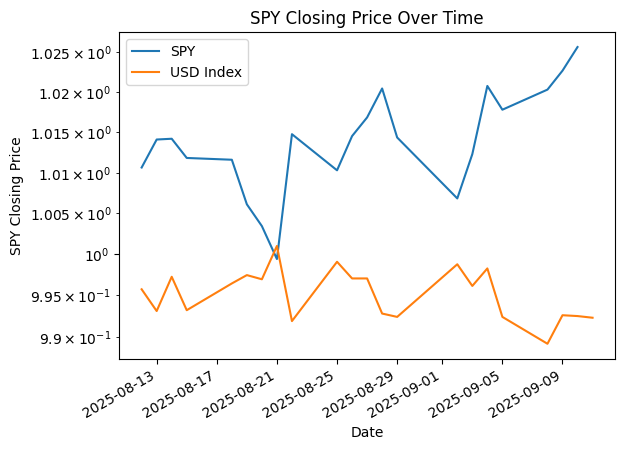

In [7]:
# Dashboard with equity (SPY), forex (USD), commodities (Gold, crude oil, wheat), bonds (Inflation-linked bonds).
# Data about growth, inflation, volatility, and yield.
# Data goes back as far as possible, with widget slider to choose time frame.

# import streamlit as st 
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Getting the data for SPY (daily)
# Closing prices only
data = yf.download("SPY")['Close']
data.to_csv("spy_data.csv")
print(data.index)
print('\n\n\n\n')

spy = (pd.read_csv("spy_data.csv", index_col=0, parse_dates=True)['SPY'].pct_change() + 1).cumprod()

# # Check for missing values
# missing_values = data.isnull().sum() # number is zero, no missing values

# Plot the data
spy.plot(label='SPY')
plt.ylabel("SPY Closing Price")
plt.title("SPY Closing Price Over Time")
plt.yscale('log')

# forex using USD index
usd = (yf.download("DX-Y.NYB", start=spy.index.min())['Close'].pct_change() + 1).cumprod()
usd['DX-Y.NYB'].plot(label='USD Index')

plt.legend()
plt.show()
